In [446]:
# ----- IMPORTACION DE LIBRERIAS -----
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import math
from otsu import umbralizacionOtsu
from canny import cargarFoto


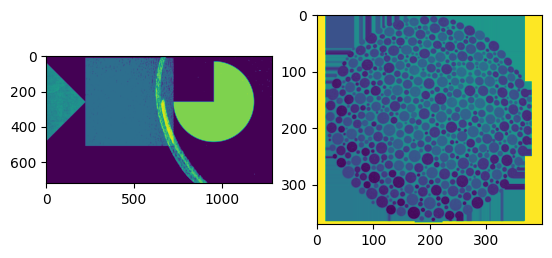

In [447]:
# ----- IMAGENES DE PRUEBA -----
foto1 = 'figuras.png'
foto2 = 'ishihara-18.png'
imagen1 = cv2.imread(foto1,0)
imagen2 = cv2.imread(foto2,0)
plt.subplot(1, 2, 1)
plt.imshow(imagen1)
plt.subplot(1, 2, 2)
plt.imshow(imagen2)


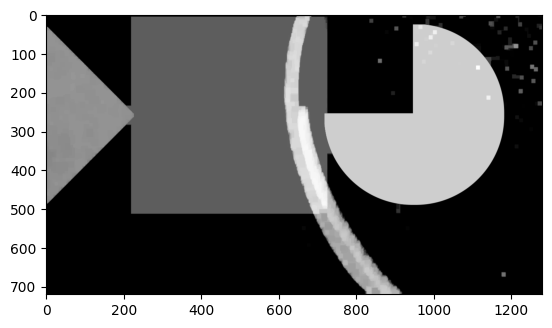

In [448]:
kernel = np.ones((5,5))
img_dilation = cv2.dilate(imagen1, kernel, iterations=5)
img_erosion = cv2.erode(img_dilation, kernel, iterations=3)
cv2.imwrite('erosion.png',img_erosion)
plt.imshow(img_erosion, cmap='gray')


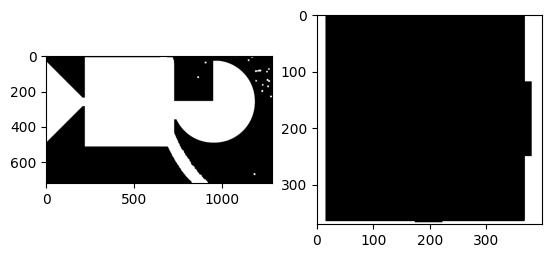

In [449]:
# ------ BINARIZACION DE LA IMAGEN ------
umbral1, imgOtsu1 = umbralizacionOtsu('erosion.png')
umbral2, imgOtsu2 = umbralizacionOtsu(foto2)
plt.subplot(1, 2, 1)
plt.imshow(imgOtsu1, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(imgOtsu2, cmap='gray')

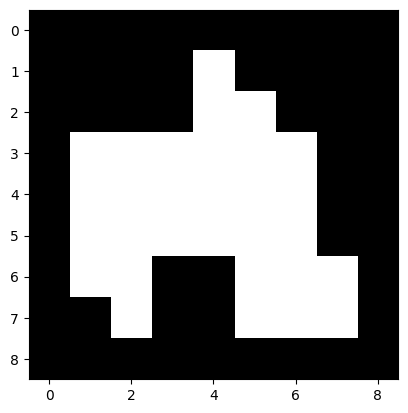

In [450]:
prueba = np.array([[0,0,0,0,0,0,0,0,0],
[0,0,0,0,255,0,0,0,0],
[0,0,0,0,255,255,0,0,0],
[0,255,255,255,255,255,255,0,0],
[0,255,255,255,255,255,255,0,0],
[0,255,255,255,255,255,255,0,0],
[0,255,255,0,0,255,255,255,0],
[0,0,255,0,0,255,255,255,0],
[0,0,0,0,0,0,0,0,0]])
filasp = 9
columnasp = 9
plt.imshow(prueba,cmap='gray')

In [451]:
imagenn = prueba

In [452]:
def puntoInicio(imgBinarizada):
    # Encuentra el primer píxel blanco en los bordes de la imagen para comenzar la cadena
    for x in range(1, imgBinarizada.shape[0] - 1):
        for y in range(1, imgBinarizada.shape[1] - 1):
            if imgBinarizada[x, y] == 255:
                    return x, y
    return None

inicio = puntoInicio(imagenn)
print(inicio)

(1, 4)


In [453]:
def chainFreeman4(imgBinarizada, puntoInicio):
    cadena = []
    coordenadas = []

    x, y = puntoInicio
    
    while True:
        if imgBinarizada[x, y] == -1:
            break
        imgBinarizada[x, y] = -1 
        coordenadas.append((x, y))

        # Derecha
        if y < imgBinarizada.shape[1] - 1 and imgBinarizada[x, y + 1] == 255:
            cadena.append(0)
            y += 1
        # Arriba
        elif x > 0 and imgBinarizada[x + 1, y] == 255:
            cadena.append(3)
            x += 1
        # Izquierda
        elif imgBinarizada[x, y - 1] == 255:
            cadena.append(2)
            y -= 1
        # Abajo
        elif y > 0  and x < imgBinarizada.shape[0] - 1 and imgBinarizada[x - 1, y] == 255:
            cadena.append(1)
            x -= 1
        else:
            cadena[len(cadena)-1]
            x,y = x-1, y-1
        
        print(x,",",y)

    return cadena,coordenadas

cadena, coordenadas = chainFreeman4(imagenn,inicio)
print("Cadena: ", cadena)
print("Coordenandas: ", coordenadas)

2 , 4
2 , 5
3 , 5
3 , 6
4 , 6
5 , 6
6 , 6
6 , 7
7 , 7
7 , 6
7 , 5
6 , 5
5 , 5
5 , 4
5 , 3
5 , 2
6 , 2
7 , 2
8 , 3


IndexError: index 9 is out of bounds for axis 0 with size 9

In [ ]:
def chainFreeman4(imgBinarizada, puntoInicio):
    cadena = []
    coordenadas = []

    x, y = puntoInicio
    
    while True:
        if imgBinarizada[x, y] == -1:
            break
        imgBinarizada[x, y] = -1 
        coordenadas.append((x, y))

        # Derecha
        if y < imgBinarizada.shape[1] - 1 and imgBinarizada[x, y + 1] == 255:
            cadena.append(0)
            y += 1
        # Arriba
        elif x > 0 and imgBinarizada[x + 1, y] == 255:
            cadena.append(1)
            x += 1
        # Izquierda
        elif y > 0 and imgBinarizada[x, y - 1] == 255:
            cadena.append(2)
            y -= 1
        # Abajo
        elif x < imgBinarizada.shape[0] - 1 and imgBinarizada[x - 1, y] == 255:
            cadena.append(3)
            x -= 1
        else:
            cadena = cadena[len(cadena)-1]

    print(x,",",y)
    return cadena,coordenadas


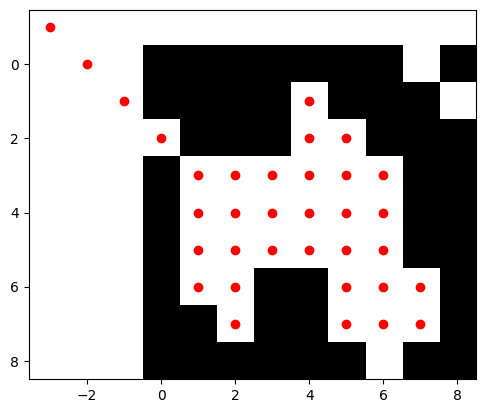

In [ ]:
imagenn = 255 - imagenn

plt.imshow(imagenn, cmap='gray')
plt.plot([i[1] for i in coordenadas], [i[0] for i in coordenadas], 'ro')  # 'ro' para puntos rojos
plt.show()

In [ ]:
def firstDifference(cadena):
     diferencias = []
     for i in range(1, len(cadena)):
        diff = (cadena[i] - cadena[i - 1]) % 4
        diferencias.append(diff)
     return diferencias

mindD = firstDifference(cadena)
print("Cadena con diferencias minimas: ", mindD)

Cadena con diferencias minimas:  [1, 3, 1, 3, 0, 0, 1, 3, 3, 0, 3, 0, 1, 0, 0, 1, 0, 2, 0, 3, 0, 0, 0, 2, 0, 0]


In [ ]:
def minimumMagnitude(cadena):
     return